### Final Project

#### Teammates
- 100943365 Bharadva, Akshay
- 100943621 Beqiri, Lorenc
- 100943058 Joshi, Kandarp
- 100941430 Soni, Karan

##### Load libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
import joblib

##### Load dataset

In [2]:
df = pd.read_csv("house_price.csv")

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


##### Exploratory Data Analysis

#### a) Descriptive statistics

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


#### b) Data visualizations

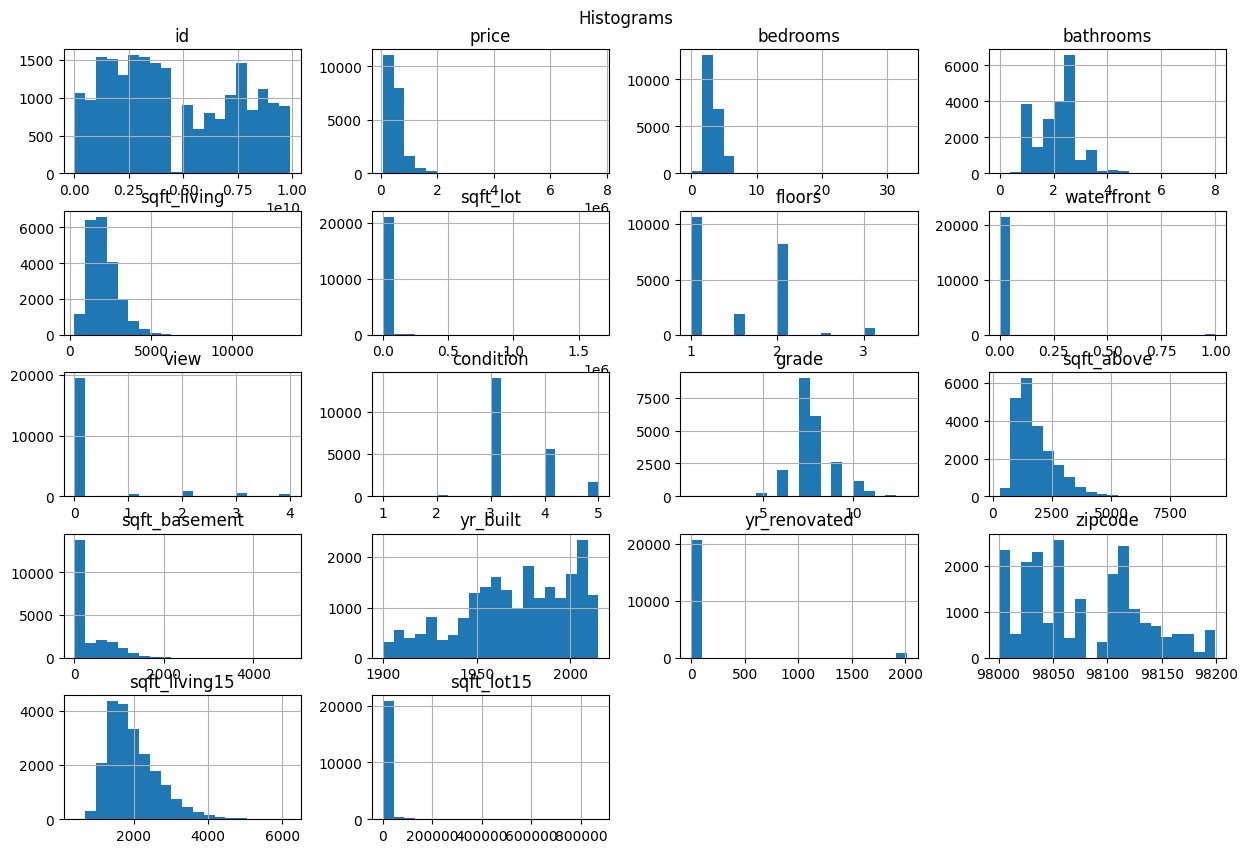

In [5]:
# Histograms
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms', y=0.92)
plt.show()

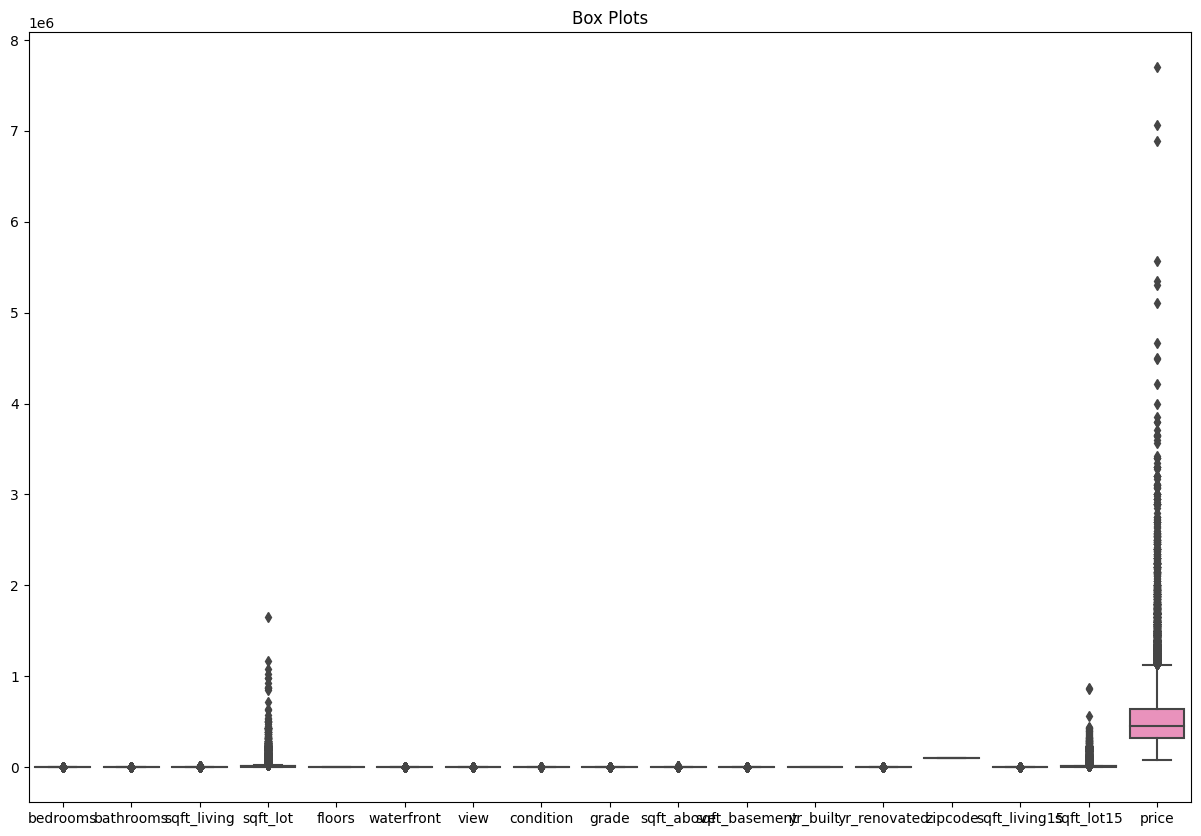

In [6]:
# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                     'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
                     'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'price']])
plt.title('Box Plots')
plt.show()

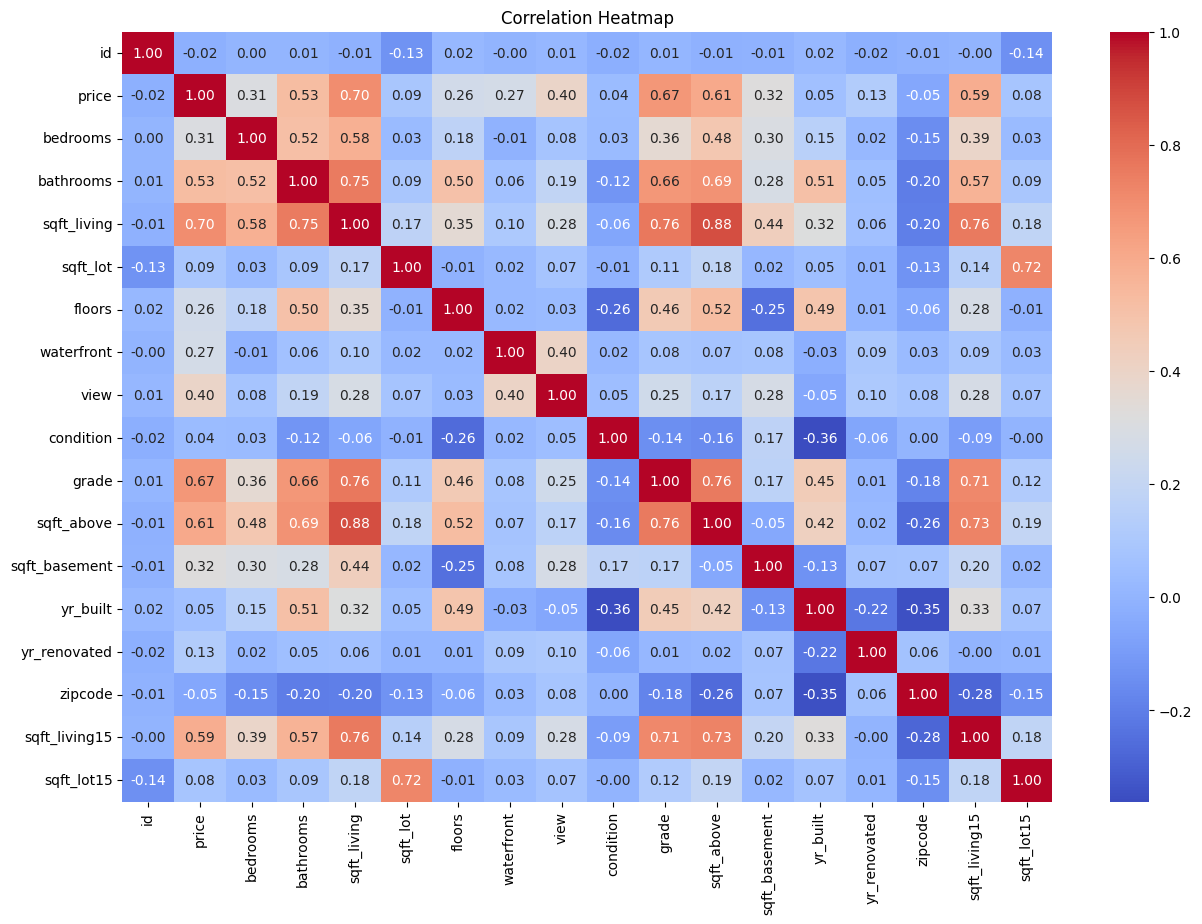

In [7]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

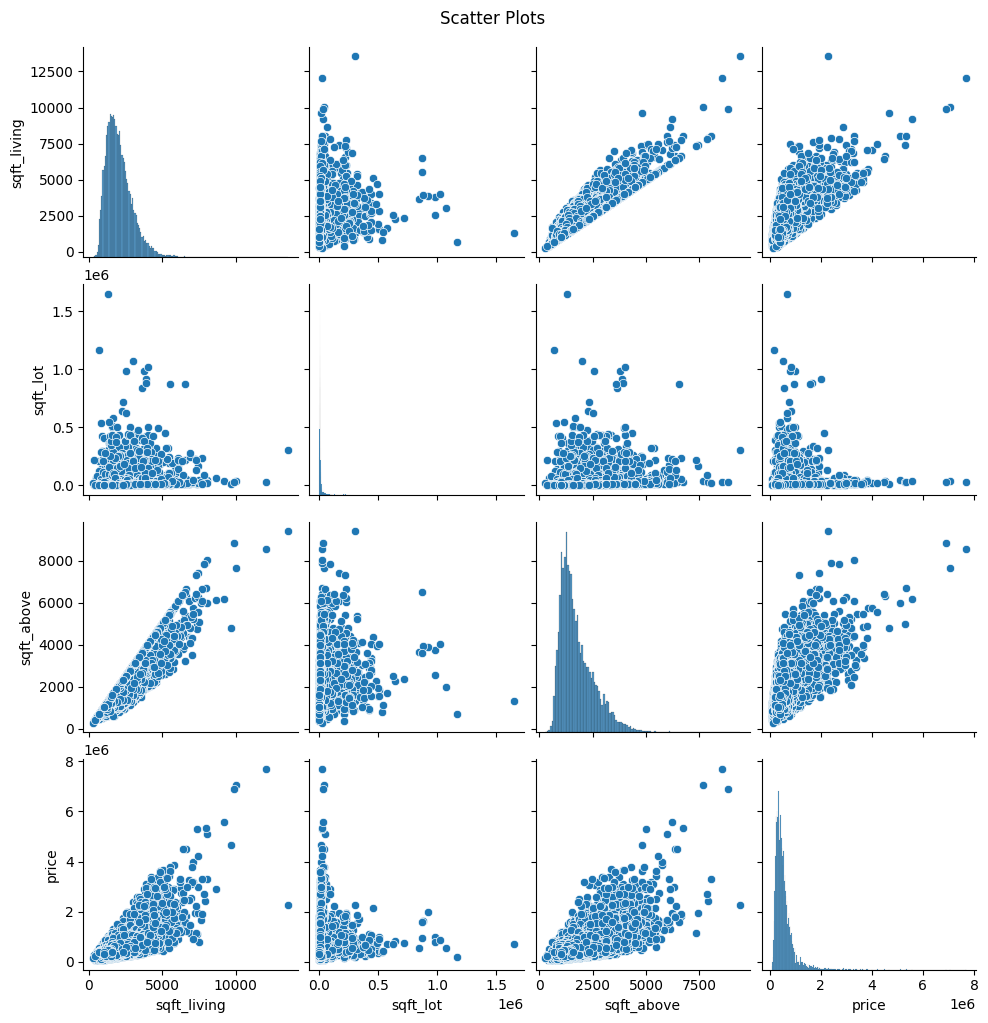

In [8]:
# Scatter Plots
sns.pairplot(df[['sqft_living', 'sqft_lot', 'sqft_above', 'price']])
plt.suptitle('Scatter Plots', y=1.02)
plt.show()

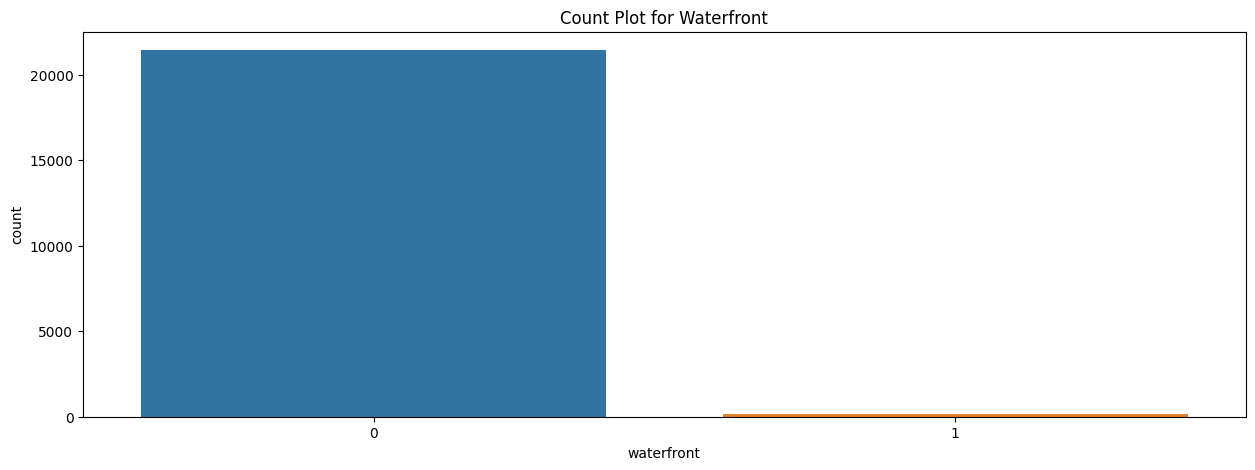

In [9]:
# Count Plots
plt.figure(figsize=(15, 5))
sns.countplot(x='waterfront', data=df)
plt.title('Count Plot for Waterfront')
plt.show()

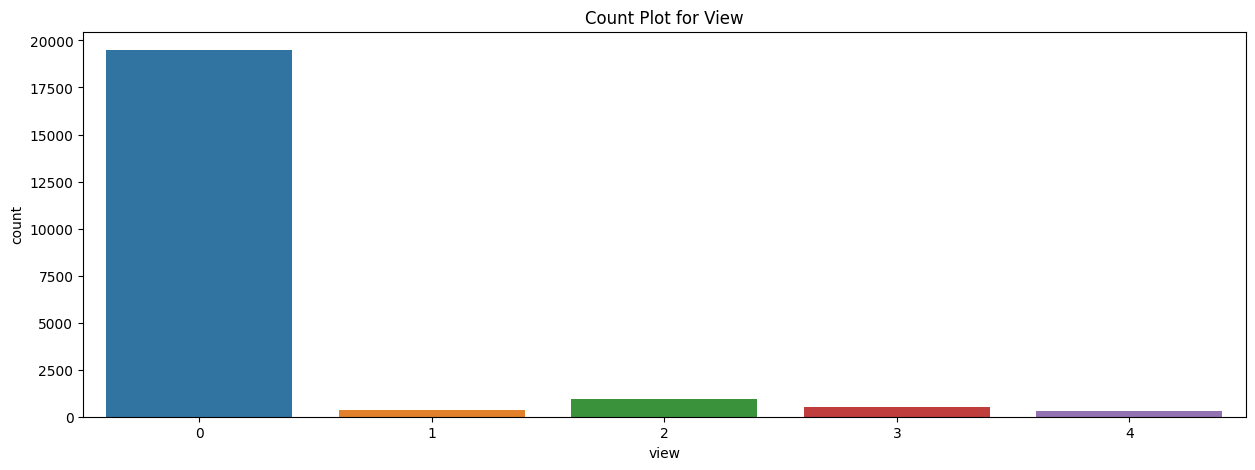

In [10]:
# Count Plots
plt.figure(figsize=(15, 5))
sns.countplot(x='view', data=df)
plt.title('Count Plot for View')
plt.show()

##### Prepare Data

#### a) Data Cleaning

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
# Handling outliers
z_scores = zscore(df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                      'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
                      'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'price']])
df = df[(z_scores < 3).all(axis=1)]
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,2238,6819


In [13]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,2238,6819


In [14]:
# Handling duplicate values
df = df.drop_duplicates()

In [15]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
sqft_living15             int64
sqft_lot15                int64
dtype: object

#### b) Feature Selection

In [16]:
df['total_sqft'] = df['sqft_above'] + df['sqft_basement']

selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'total_sqft', 'floors', 'zipcode', 'price']

#### c) Data Transforms

In [17]:
df = df[selected_features]

df['price'] = np.log1p(df['price'])

# Scaling numerical variables
scaler = StandardScaler()
df[['sqft_living', 'sqft_lot', 'total_sqft']] = scaler.fit_transform(df[['sqft_living', 'sqft_lot', 'total_sqft']])

# Handling categorical variables
# one-hot encoding
df = pd.get_dummies(df, columns=['zipcode'], drop_first=True)

In [18]:
df.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,total_sqft,floors,price,zipcode_98002,zipcode_98003,zipcode_98004,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,-1.034659,-0.369424,-1.034659,1.0,12.309987,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,1.00,-1.589636,0.006097,-1.589636,1.0,12.100718,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,0.021151,-0.425536,0.021151,1.0,13.311331,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,-0.357858,-0.159650,-0.357858,1.0,13.142168,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,2.25,-0.310481,-0.268508,-0.310481,2.0,12.458779,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Model Building and Evaluate Algorithms

#### a) Split-out validation dataset 

In [19]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### b) Test options and evaluation metric 

In [20]:
# Using negative MSE as a score 
# higher is better
scoring = 'neg_mean_squared_error'  

#### c) Spot Check Algorithms 

In [21]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('SVR', SVR()),
    ('kNN', KNeighborsRegressor())
]

#### d) Compare Algorithms 

In [22]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean MSE: {cv_results.mean()}, Standard Deviation: {cv_results.std()}")

Linear Regression: Mean MSE: -0.037876759717275416, Standard Deviation: 0.0023808928753631573
Decision Tree: Mean MSE: -0.08422417050208394, Standard Deviation: 0.005888328412102148
Random Forest: Mean MSE: -0.04607363162015266, Standard Deviation: 0.002993647901678928
SVR: Mean MSE: -0.036267471802084936, Standard Deviation: 0.0019086097896813163
kNN: Mean MSE: -0.044856354683702325, Standard Deviation: 0.0029066600031881946


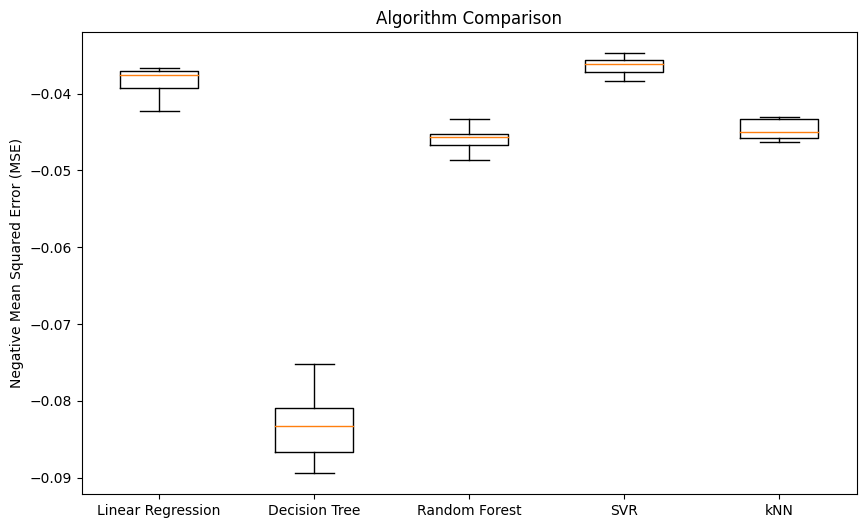

In [23]:
# Comparing Algorithms using boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names, showfliers=False)
plt.title('Algorithm Comparison')
plt.ylabel('Negative Mean Squared Error (MSE)')
plt.show()

#### Improve Accuracy 

#### a) Algorithm Tuning 

##### Linear Regression:

In [24]:
model_lr = LinearRegression()

param_grid_lr = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
}

# Performing grid search
grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=5, scoring=scoring)
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_

# Training the model
model_lr_tuned = LinearRegression(**best_params_lr)
model_lr_tuned.fit(X_train, y_train)

# Evaluating the tuned model
y_pred_lr_tuned = model_lr_tuned.predict(X_test)
mse_lr_tuned = mean_squared_error(y_test, y_pred_lr_tuned)
print(f"Tuned Linear Regression - Mean Squared Error on Validation Set: {mse_lr_tuned}")

C:\Users\aksha\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\aksha\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

Tuned Linear Regression - Mean Squared Error on Validation Set: 0.037686366249634194


##### Decision Tree:


In [25]:
model_dt = DecisionTreeRegressor(random_state=42)

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing grid search
grid_search_dt = GridSearchCV(model_dt, param_grid_dt, cv=5, scoring=scoring)
grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_

# Training the model
model_dt_tuned = DecisionTreeRegressor(**best_params_dt, random_state=42)
model_dt_tuned.fit(X_train, y_train)

# Evaluating the tuned model
y_pred_dt_tuned = model_dt_tuned.predict(X_test)
mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned)
print(f"Tuned Decision Tree - Mean Squared Error on Validation Set: {mse_dt_tuned}")

Tuned Decision Tree - Mean Squared Error on Validation Set: 0.06961236913657948


##### Random Forest:


In [26]:
model_rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing grid search
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring=scoring)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_

# Training the model
model_rf_tuned = RandomForestRegressor(**best_params_rf, random_state=42)
model_rf_tuned.fit(X_train, y_train)

# Evaluating the tuned model
y_pred_rf_tuned = model_rf_tuned.predict(X_test)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
print(f"Tuned Random Forest - Mean Squared Error on Validation Set: {mse_rf_tuned}")

##### Support Vector Regressor (SVR):


In [ ]:
model_svr = SVR()

param_grid_svr = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
}

# Performing grid search
grid_search_svr = GridSearchCV(model_svr, param_grid_svr, cv=5, scoring=scoring)
grid_search_svr.fit(X_train, y_train)

best_params_svr = grid_search_svr.best_params_

# Training the model
model_svr_tuned = SVR(**best_params_svr)
model_svr_tuned.fit(X_train, y_train)

# Evaluating the tuned model
y_pred_svr_tuned = model_svr_tuned.predict(X_test)
mse_svr_tuned = mean_squared_error(y_test, y_pred_svr_tuned)
print(f"Tuned SVR - Mean Squared Error on Validation Set: {mse_svr_tuned}")

##### k-Nearest Neighbors (kNN):


In [ ]:
model_knn = KNeighborsRegressor()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Performing grid search
grid_search_knn = GridSearchCV(model_knn, param_grid_knn, cv=5, scoring=scoring)
grid_search_knn.fit(X_train, y_train)

best_params_knn = grid_search_knn.best_params_

# Training the model
model_knn_tuned = KNeighborsRegressor(**best_params_knn)
model_knn_tuned.fit(X_train, y_train)

# Evaluating the tuned model
y_pred_knn_tuned = model_knn_tuned.predict(X_test)
mse_knn_tuned = mean_squared_error(y_test, y_pred_knn_tuned)
print(f"Tuned kNN - Mean Squared Error on Validation Set: {mse_knn_tuned}")


#### b) Ensembles 

In [ ]:
# Create a stacking ensemble with tuned models
ensemble_model = StackingRegressor(
    estimators=[
        ('lr', model_lr_tuned),
        ('dt', model_dt_tuned),
        ('rf', model_rf_tuned),
        ('svr', model_svr_tuned),
        ('knn', model_knn_tuned)
    ],
    final_estimator=LinearRegression()
)

# Train the ensemble model on the test set
ensemble_model.fit(X_test, y_test)

# Making predictions on the test set using the ensemble
y_pred_ensemble = ensemble_model.predict(X_test)

In [ ]:
# Plotting graph on ensemble's predicted value and validation value
plt.scatter(X_test,y_test,c="r")
plt.scatter(X_test,y_pred_ensemble,c="b")
plt.show()

#### Finalize Model

In [ ]:
# Training the final ensemble model on the entire training set
ensemble_model.fit(X, y)

In [ ]:
y_pred = ensemble_model.predict(X_test)

In [ ]:
mse_ensemble_model_test = mean_squared_error(y_test, y_pred)
print(f"Final Model - Mean Squared Error on Validation Set: {mse_ensemble_model_test}")


In [ ]:
joblib.dump(ensemble_model, 'final_ensemble_model.joblib')

#### Conclusion and Recommendations

1. Data Understanding:
    - The dataset, consisting of housing-related features and prices, was thoroughly explored, revealing the distribution of key variables.
    - Descriptive statistics and visualizations provided a comprehensive overview of the dataset's characteristics.

2. Data Preparation:
    - Data cleaning addressed missing values, outliers, and inconsistencies, enhancing the dataset's quality.
    - Feature selection and transformation contributed to model efficiency by focusing on relevant features and ensuring data compatibility with chosen algorithms.

3. Model Evaluation:
    - Multiple algorithms were tested and compared using appropriate evaluation metrics.
    - Preliminary model evaluations allowed us to identify promising candidates for further tuning and ensemble modeling.

4. Model Improvement:
    - Algorithm tuning involved adjusting hyperparameters to optimize model performance.
    - Ensemble techniques, such as stacking, were employed to combine the strengths of different models and enhance overall accuracy.

5. Model Finalization:
    - Models were finalized by making predictions on validation datasets, creating standalone models on the entire training dataset, and saving the models for future use.

#### Recommendations:

1. Further Data Exploration:
    - Exploring the dataset to uncover additional patterns and insights that may contribute to model performance.

2. Feature Engineering:
    - Exploring the possibility of creating new features or transforming existing ones to enhance the predictive power of the models.

3. Advanced Modeling Techniques:
    - Exploring more advanced modeling techniques such as gradient boosting or neural networks for potential improvements.

4. Continuous Monitoring:
    - Regularly monitoring model's performance in a real-world setting and updating models as needed to ensure continued accuracy.